In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')
print('The shape of data for EDA is -', df.shape)

The shape of data for EDA is - (232281, 18)


In [ ]:
print('The features in the dataset are -\n', df.columns)

The features in the dataset are -
 Index(['UID', 'application', 'request_id', 'request_type', 'request_status',
       'account_name', 'entitlement', 'entitlement_value', 'approval_type',
       'approver', 'approved_on', 'approval_status', 'requested_on',
       'Unnamed: 0', 'employeeType', 'dept', 'div', 'hrOrganizationCode'],
      dtype='object')


In [ ]:
print('The data types of variables in dataset -\n', df.dtypes)

The data types of variables in dataset -
 UID                   object
application           object
request_id            object
request_type          object
request_status        object
account_name          object
entitlement           object
entitlement_value     object
approval_type         object
approver              object
approved_on           object
approval_status       object
requested_on          object
Unnamed: 0             int64
employeeType          object
dept                  object
div                   object
hrOrganizationCode    object
dtype: object


In [ ]:
columns=['approved_on','requested_on','Unnamed: 0','employeeType','approver', 'request_id']
df_reduced = df.drop(columns, axis=1)
print('The shape of data with reduced features is -', df_reduced.shape)

The shape of data with reduced features is - (232281, 12)


In [ ]:
# Encoding the target variable

df['approval_status'][df['approval_status'] == 'Approved'] = 1
df['approval_status'][df['approval_status'] == 'Rejected'] = 0

<ipython-input-8-7af10556c843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approval_status'][df['approval_status'] == 'Approved'] = 1
<ipython-input-8-7af10556c843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approval_status'][df['approval_status'] == 'Rejected'] = 0


In [ ]:
# Encoding the target variable

df['approval_status'][df['approval_status'] == 'Approved'] = 1
df['approval_status'][df['approval_status'] == 'Rejected'] = 0

<ipython-input-9-7af10556c843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approval_status'][df['approval_status'] == 'Approved'] = 1
<ipython-input-9-7af10556c843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approval_status'][df['approval_status'] == 'Rejected'] = 0


In [ ]:
# Dividing into dependent and independent variables

X = df.drop(['approval_status'], axis=1)
y = df['approval_status']

In [ ]:
y = y.astype('int')

In [ ]:
# Encoding the independent variables (features)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in X.columns:
    X[col] = encoder.fit_transform(X[col])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler()
ros = RandomOverSampler()

In [ ]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
'''def predict(X_train, X_test, y_train, y_test):
  #Setup arrays to store training and test accuracies
  neighbors = np.arange(1,9)
  train_accuracy =np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))

  for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

  plt.title('k-NN Varying number of neighbors')
  plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
  plt.plot(neighbors, train_accuracy, label='Training accuracy')
  plt.legend()
  plt.xlabel('Number of neighbors')
  plt.ylabel('Accuracy')
  plt.show()
  
  return '''

"def predict(X_train, X_test, y_train, y_test):\n  #Setup arrays to store training and test accuracies\n  neighbors = np.arange(1,9)\n  train_accuracy =np.empty(len(neighbors))\n  test_accuracy = np.empty(len(neighbors))\n\n  for i,k in enumerate(neighbors):\n    #Setup a knn classifier with k neighbors\n    knn = KNeighborsClassifier(n_neighbors=k)\n    \n    #Fit the model\n    knn.fit(X_train, y_train)\n    \n    #Compute accuracy on the training set\n    train_accuracy[i] = knn.score(X_train, y_train)\n    \n    #Compute accuracy on the test set\n    test_accuracy[i] = knn.score(X_test, y_test)\n\n  plt.title('k-NN Varying number of neighbors')\n  plt.plot(neighbors, test_accuracy, label='Testing Accuracy')\n  plt.plot(neighbors, train_accuracy, label='Training accuracy')\n  plt.legend()\n  plt.xlabel('Number of neighbors')\n  plt.ylabel('Accuracy')\n  plt.show()\n  \n  return "

In [ ]:
#Predict for undersampled data
#predict(X_train_rus, X_test, y_train_rus, y_test)

In [ ]:
#Predict for oversampled data
#predict(X_train_ros, X_test, y_train_ros, y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_ros,y_train_ros)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.958579572880383

In [ ]:
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
print('Confusion Matrix \n------------------------------------------------------------')
print(cf_matrix)

Confusion Matrix 
------------------------------------------------------------
[[ 2608   924]
 [ 2251 70870]]


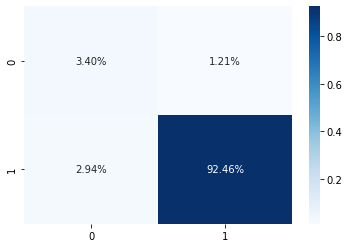

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

KeyboardInterrupt: ignored

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

In [ ]:
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred)

0.9780906048373184